## COMP7404 - Computational Intelligence and Machine Learning; Instructor: 
## Will employee leave the company or not? – Comparison of Machine Learning Techniques

### 1. Installing Python packages

Please make sure you have installed the following packages successfully. The version of sklearn and numpy should also be updated.
Then run every block to import the packages.

In [1]:
!pip install deslib
!pip install sklearn
!pip install keras
!pip install tensorflow
!pip install matplotlib

In [1]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Importing DS techniques
from deslib.dcs.ola import OLA
from deslib.dcs.rank import Rank
from deslib.des.des_p import DESP
from deslib.des.knora_e import KNORAE
from deslib.des import METADES
from deslib.static import StackedClassifier
from deslib.util.datasets import make_P2

In [2]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from keras import losses
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score, f1_score
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier

In [3]:
#visualization
from matplotlib.cm import get_cmap
from matplotlib.ticker import FuncFormatter

### 2. Data Loading and Cleaning ( One hot encoding )

Please make sure that all of these 3 csv files are PLACED IN THE SAME DIRECTORY of the main.ipynb's. Nothing special, you only need to run every block subsequently.

In [4]:
general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')

In [5]:
data = pd.merge(general_data, manager_survey_data, on = 'EmployeeID')
data = pd.merge(data, employee_survey_data, on = 'EmployeeID')
data = data.dropna()  # Simply dropping nan
data = data.drop(['EmployeeID','EmployeeCount'],axis = 1).reset_index(drop=True)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,6.0,2,6,1,5,2,3,3.0,4.0,3.0
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4297,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4298,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0


In [6]:
data_hot = pd.get_dummies(data, columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18'])
data_hot.head() # one-hot-encoding for those with Dtype = 'object'

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,51,No,6,2,1,131160,1.0,11,8,0,...,0,0,0,0,0,0,0,1,0,1
1,31,Yes,10,1,1,41890,0.0,23,8,1,...,0,0,0,1,0,0,0,0,1,1
2,32,No,17,4,4,193280,1.0,15,8,3,...,0,0,0,0,1,0,0,1,0,1
3,38,No,2,5,3,83210,3.0,11,8,3,...,0,0,0,0,0,0,0,1,0,1
4,32,No,10,1,1,23420,4.0,12,8,2,...,0,0,0,0,1,0,0,0,1,1


### 3. Defining functions 

In this part, we define some functions that can be used later on. Make sure to run these blocks before moving on.

In [7]:
def deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k=5,
                   show_classification_report = False, show_confusion_matrix = False,
                   plot_accuracy = False, plot_recall = False, plot_f1 = False):
    
    origin = pool_classifiers           # origin means not to use any technique in deslib 
    knora_e = KNORAE(pool_classifiers, k=k).fit(x_train, y_train.values.ravel())   # Transforming the pool_classifiers into DES estimators
    desp = DESP(pool_classifiers, k=k).fit(x_train, y_train.values.ravel())
    ola = OLA(pool_classifiers, k=k).fit(x_train, y_train.values.ravel())
    rank = Rank(pool_classifiers, k=k).fit(x_train, y_train.values.ravel())
    meta = METADES(pool_classifiers, k=k).fit(x_train, y_train.values.ravel())

    y_test_predict_origin = origin.predict(x_test)
    y_test_predict_knora_e = knora_e.predict(x_test)
    y_test_predict_desp = desp.predict(x_test)
    y_test_predict_ola = ola.predict(x_test)
    y_test_predict_rank = rank.predict(x_test)
    y_test_predict_meta = meta.predict(x_test)

    pred_list = [y_test_predict_origin, y_test_predict_knora_e, y_test_predict_desp, y_test_predict_ola, y_test_predict_rank, y_test_predict_meta]
    pred_list_name = ['ORIGIN', 'KNORAE', 'DESP', 'OLA ', 'Rank ', 'METADES']
    accuracy_dic = {}; recall_dic = {}; f1_dic = {}
    accuracy_list = []; recall_list = []; f1_list = []


    for index in range(len(pred_list)):
        accuracy_dic[pred_list_name[index]] = np.round(accuracy_score(y_test.reset_index(drop=True).values, pred_list[index]), 3)
        recall_dic[pred_list_name[index]] = np.round(recall_score(y_test.reset_index(drop=True).values, pred_list[index],  pos_label = 'Yes'), 3)
        f1_dic[pred_list_name[index]] = np.round(f1_score(y_test.reset_index(drop=True).values, pred_list[index],  pos_label = 'Yes'), 3)
        
        accuracy_list.append(np.round(accuracy_score(y_test.reset_index(drop=True).values, pred_list[index]), 3))
        recall_list.append(np.round(recall_score(y_test.reset_index(drop=True).values, pred_list[index],  pos_label = 'Yes'), 3))
        f1_list.append(np.round(f1_score(y_test.reset_index(drop=True).values, pred_list[index],  pos_label = 'Yes'), 3))
        
        
    
    if show_confusion_matrix == True:
        for index in range(len(pred_list)):
            print('The confusion matrix of {}: '.format(pred_list_name[index]), end = "")
            ConfusionMatrixDisplay.from_predictions(y_test.reset_index(drop=True),pred_list[index])
            plt.show()
            
    if show_classification_report == True:
        for index in range(len(pred_list)):
            print('The classification_report of {}: '.format(pred_list_name[index]))
            print(classification_report(y_test.reset_index(drop=True), pred_list[index]))
    
    ###################### plot ######################################
    cmap = get_cmap('Dark2')
    n = len(pred_list)
    colors = [cmap(i) for i in np.linspace(0, 1, (n-1))]
    labels = pred_list_name
    
    if plot_accuracy == True:
        fig, ax = plt.subplots()
        pct_formatter = FuncFormatter(lambda x, pos: '{:.1f}'.format(x * 100))
        ax.bar(np.arange((n)), accuracy_list, color=colors,tick_label=labels)
        ax.set_ylim(0, 1)
        ax.set_xlabel('Method', fontsize=13)
        ax.set_ylabel('Accuracy on the test set (%)', fontsize=13)
        ax.yaxis.set_major_formatter(pct_formatter)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        plt.subplots_adjust(bottom=0.15)
        plt.show()
        
    if plot_recall == True:
        fig, ax = plt.subplots()
        pct_formatter = FuncFormatter(lambda x, pos: '{:.1f}'.format(x * 100))
        ax.bar(np.arange((n)), recall_list, color=colors,tick_label=labels)
        ax.set_ylim(0.0, 1)
        ax.set_xlabel('Method', fontsize=13)
        ax.set_ylabel('Recall on the test set (%)', fontsize=13)
        ax.yaxis.set_major_formatter(pct_formatter)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        plt.subplots_adjust(bottom=0.15)
        plt.show()
        
    if plot_f1 == True:
        fig, ax = plt.subplots()
        pct_formatter = FuncFormatter(lambda x, pos: '{:.1f}'.format(x * 100))
        ax.bar(np.arange((n)), f1_list, color=colors,tick_label=labels)
        ax.set_ylim(0.0, 1)
        ax.set_xlabel('Method', fontsize=13)
        ax.set_ylabel('F1 on the test set (%)', fontsize=13)
        ax.yaxis.set_major_formatter(pct_formatter)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
        plt.subplots_adjust(bottom=0.15)
        plt.show()
        

    return accuracy_dic, recall_dic, f1_dic

In [8]:
def print_accuracy(accuracy_dic):
    for key, value in accuracy_dic.items():
        print(f'The accuracy performance of {key}: {value} ')
        
def print_recall(recall_dic):
    for key, value in recall_dic.items():
        print(f'The recall performance of {key}: {value} ')

def print_f1(f1_dic):
    for key, value in f1_dic.items():
        print(f'The f1 performance of {key}: {value} ')


### 4. Start to train - Deslib - AdaBoost

In this part, the base ensemble method is Adaptive Boost, and the function deslib_process returns all the performance of DES models based on AdaBoost. Set True for the plots you want to see. For example, if you want to see the plot ot accuracy comparasion, set plot_accuracy = True.

"AdaBoostClassifier" comes from sklearn.

In [9]:
y = data_hot[['Attrition']]
x = data_hot.drop(['Attrition'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7404)

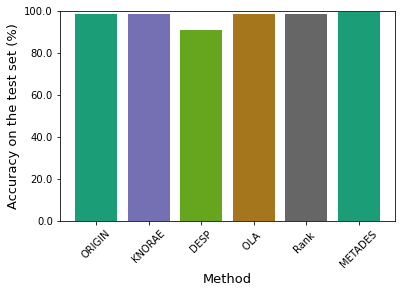

In [10]:
pool_classifiers = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),  
                                      n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = True, plot_recall = False, plot_f1 = False)

In [11]:
print_accuracy(accuracy_dic)  # You can extract the values and names in the format of dictionary

The accuracy performance of ORIGIN: 0.985 
The accuracy performance of KNORAE: 0.988 
The accuracy performance of DESP: 0.912 
The accuracy performance of OLA : 0.987 
The accuracy performance of Rank : 0.987 
The accuracy performance of METADES: 0.995 


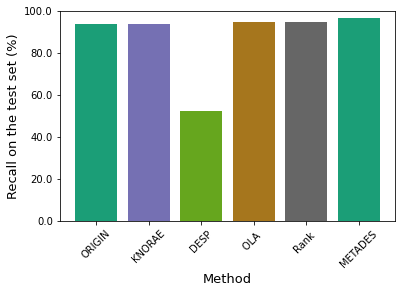

In [42]:
pool_classifiers = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),  # max_depth selection is very important for deslib's enhencement
                                      n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = True, plot_f1 = False)

In [44]:
print_recall(recall_dic) 

The recall performance of ORIGIN: 0.939 
The recall performance of KNORAE: 0.939 
The recall performance of DESP: 0.523 
The recall performance of OLA : 0.949 
The recall performance of Rank : 0.949 
The recall performance of METADES: 0.967 


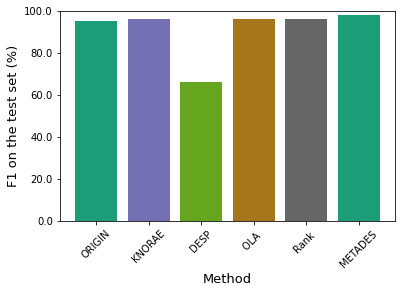

In [41]:
pool_classifiers = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),  # max_depth selection is very important for deslib's enhencement
                                      n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = False, plot_f1 = True)

In [46]:
# print_f1(f1_dic)
print_f1(f1_dic) # You can extract the values and names in the format of dictionary

The f1 performance of ORIGIN: 0.955 
The f1 performance of KNORAE: 0.962 
The f1 performance of DESP: 0.665 
The f1 performance of OLA : 0.96 
The f1 performance of Rank : 0.96 
The f1 performance of METADES: 0.983 


### 5. Start to train - Deslib - BaggingClassifier

In this part, the base ensemble method is Bagging, and the function deslib_process returns all the performance of DES models based on Bagging Classifier. 

"BaggingClassifier" comes from sklearn.

In [15]:
pool_classifiers = BaggingClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = True, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = False, plot_f1 = False)

The classification_report of ORIGIN: 
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1076
         Yes       1.00      0.95      0.97       214

    accuracy                           0.99      1290
   macro avg       0.99      0.97      0.98      1290
weighted avg       0.99      0.99      0.99      1290

The classification_report of KNORAE: 
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1076
         Yes       1.00      0.95      0.97       214

    accuracy                           0.99      1290
   macro avg       0.99      0.97      0.98      1290
weighted avg       0.99      0.99      0.99      1290

The classification_report of DESP: 
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1076
         Yes       1.00      0.95      0.97       214

    accuracy                           0.99      1290
   macro avg    

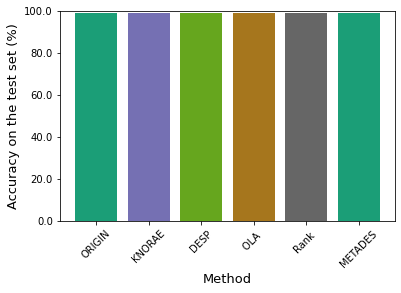

In [52]:
pool_classifiers = BaggingClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = True, plot_recall = False, plot_f1 = False)

In [55]:
print_accuracy(accuracy_dic)

The accuracy performance of ORIGIN: 0.991 
The accuracy performance of KNORAE: 0.991 
The accuracy performance of DESP: 0.991 
The accuracy performance of OLA : 0.991 
The accuracy performance of Rank : 0.991 
The accuracy performance of METADES: 0.991 


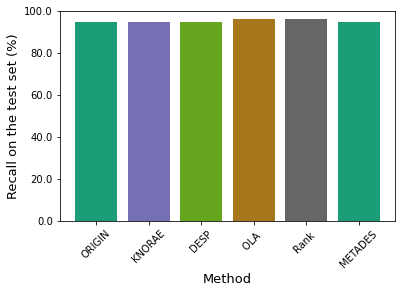

In [53]:
pool_classifiers = BaggingClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = True, plot_f1 = False)

In [56]:
print_recall(recall_dic) 

The recall performance of ORIGIN: 0.949 
The recall performance of KNORAE: 0.949 
The recall performance of DESP: 0.949 
The recall performance of OLA : 0.963 
The recall performance of Rank : 0.963 
The recall performance of METADES: 0.949 


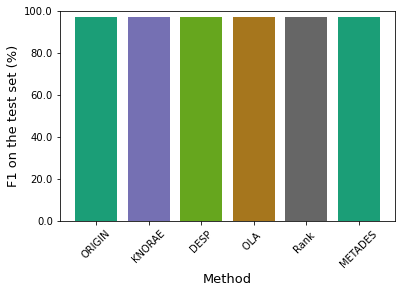

In [54]:
pool_classifiers = BaggingClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = False, plot_f1 = True)

In [16]:
print_f1(f1_dic)

The f1 performance of ORIGIN: 0.974 
The f1 performance of KNORAE: 0.974 
The f1 performance of DESP: 0.974 
The f1 performance of OLA : 0.974 
The f1 performance of Rank : 0.974 
The f1 performance of METADES: 0.974 


### 6. Start to train - Random Forest

In this part, the base ensemble method is Random Forest, and the function deslib_process returns all the performance of DES models based on Random Forest Classifier. 

"RandomForestClassifier" comes from sklearn.

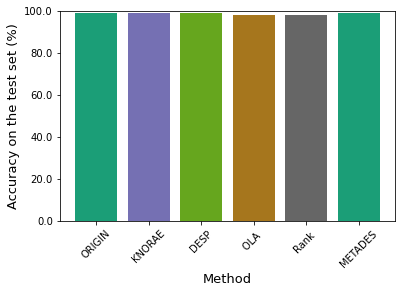

In [48]:
pool_classifiers = RandomForestClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = True, plot_recall = False, plot_f1 = False)

In [51]:
print_accuracy(accuracy_dic)

The accuracy performance of ORIGIN: 0.991 
The accuracy performance of KNORAE: 0.991 
The accuracy performance of DESP: 0.991 
The accuracy performance of OLA : 0.983 
The accuracy performance of Rank : 0.983 
The accuracy performance of METADES: 0.991 


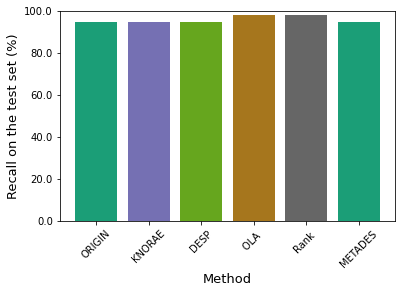

In [49]:
pool_classifiers = RandomForestClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = True, plot_f1 = False)

In [50]:
print_recall(recall_dic) 

The recall performance of ORIGIN: 0.949 
The recall performance of KNORAE: 0.949 
The recall performance of DESP: 0.949 
The recall performance of OLA : 0.981 
The recall performance of Rank : 0.981 
The recall performance of METADES: 0.949 


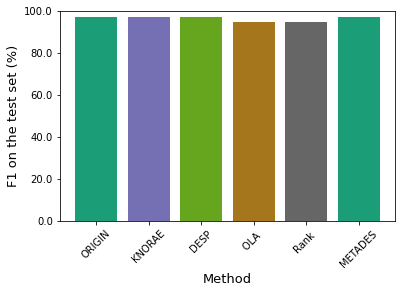

In [17]:
pool_classifiers = RandomForestClassifier(n_estimators=100, random_state=7404)
pool_classifiers.fit(x_train, y_train.values.ravel())
accuracy_dic, recall_dic, f1_dic = deslib_process(pool_classifiers, x_train, x_test, y_train, y_test, k = 6,
                                            show_classification_report = False, show_confusion_matrix = False,
                                            plot_accuracy = False, plot_recall = False, plot_f1 = True)

In [18]:
print_f1(f1_dic)

The f1 performance of ORIGIN: 0.974 
The f1 performance of KNORAE: 0.974 
The f1 performance of DESP: 0.974 
The f1 performance of OLA : 0.95 
The f1 performance of Rank : 0.95 
The f1 performance of METADES: 0.974 


### 7. Start to train - Neural Network

Run the code subsequently and everything should be out of trouble.

Notice that we re-define the input data here so as to fit the format of the Neural Network. The output layer only consists of one node, generated by sigmoid function, so we only extract the value Attrition == Yes or No (map to 1 or 0).

Also notice that the result may be different everytime, because there is randomness in Neural Network.(IMPORTANT, might be different with the result shown in our presentation.)

In [21]:
y = data_hot[['Attrition']]
x = data_hot.drop(['Attrition'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7404)

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))     # Min Max Scaling is very important in DNN
x_train = pd.DataFrame(scaler.fit_transform(np.array(x_train)))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

In [23]:
y_train = pd.get_dummies(y_train)[['Attrition_Yes']]
y_test = pd.get_dummies(y_test)[['Attrition_Yes']]   # get dummy, only one output

In [24]:
input_shape = x_train.shape[1] # 46

In [25]:
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (input_shape,)))
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(128, activation = 'relu'))
network.add(layers.Dense(1, activation = 'sigmoid')) # output layer
network.compile(optimizer = 'adam', loss = losses.binary_crossentropy, metrics = ['accuracy'])

In [26]:
network.fit(x_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.8169
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8402
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3571 - accuracy: 0.8545
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8754
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8887
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.9209
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9282
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9608
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9748
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9834
Epoch 11/

In [27]:
test_loss, test_acc = network.evaluate(x_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0680 - accuracy: 0.9930


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1076
           1       1.00      0.95      0.97       214

    accuracy                           0.99      1290
   macro avg       0.99      0.97      0.98      1290
weighted avg       0.99      0.99      0.99      1290



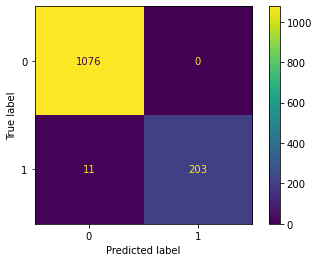

In [28]:
pred_y_test = pd.DataFrame(np.around(network.predict(x_test), 1).astype(int)).reset_index(drop=True)
real_y_test = y_test.reset_index(drop=True)

print(classification_report(real_y_test, pred_y_test))
# confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(real_y_test, pred_y_test)
plt.show()

In [27]:
print(f'The accuracy performance of DNN: {np.round(accuracy_score(real_y_test, pred_y_test), 3)} ')
print(f'The recall performance of DNN: {np.round(recall_score(real_y_test, pred_y_test), 3)} ')
print(f'The f1 performance of DNN: {np.round(f1_score(real_y_test, pred_y_test), 3)} ')

The accuracy performance of DNN: 0.993 
The recall performance of DNN: 0.958 
The f1 performance of DNN: 0.979 


### 8. SVM

Run the code subsequently and everything should be out of trouble.

The block of grid_search might take some time but don't worry.

In [29]:
y = data_hot[['Attrition']]
x = data_hot.drop(['Attrition'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7404)

In [30]:
scaler = MinMaxScaler(feature_range=(0,1))
x_train = pd.DataFrame(scaler.fit_transform(np.array(x_train)))
x_test = pd.DataFrame(scaler.fit_transform(x_test))

In [31]:
y_train = pd.get_dummies(y_train)[['Attrition_Yes']]
y_test = pd.get_dummies(y_test)[['Attrition_Yes']]   # get dummy, only one output

In [32]:
tuned_parameters = [{'C': np.logspace(-3, 3, 7),
                     'gamma': np.logspace(-3, 3, 7)}]
model = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5)
model.fit(x_train, y_train.values.ravel())
model.best_params_

{'C': 1.0, 'gamma': 10.0}

In [33]:
pred_y_test = pd.DataFrame(model.predict(x_test)).reset_index(drop=True)
real_y_test = y_test.reset_index(drop=True)

In [34]:
print(f'The accuracy performance of DNN: {np.round(accuracy_score(real_y_test, pred_y_test), 3)} ')
print(f'The recall performance of DNN: {np.round(recall_score(real_y_test, pred_y_test), 3)} ')
print(f'The f1 performance of DNN: {np.round(f1_score(real_y_test, pred_y_test), 3)} ')

The accuracy performance of DNN: 0.99 
The recall performance of DNN: 0.939 
The f1 performance of DNN: 0.969 


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1076
           1       1.00      0.94      0.97       214

    accuracy                           0.99      1290
   macro avg       0.99      0.97      0.98      1290
weighted avg       0.99      0.99      0.99      1290



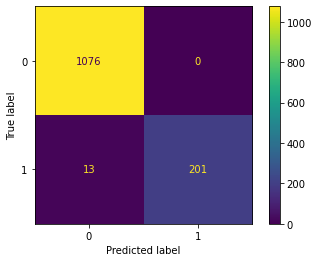

In [35]:
print(classification_report(real_y_test, pred_y_test))
# confusion matrix visualization
ConfusionMatrixDisplay.from_predictions(real_y_test, pred_y_test)
plt.show()